In [1]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas_profiling import ProfileReport

%matplotlib inline

# import data

In [2]:
df_data = pd.read_csv(os.path.join('..', 'data', 'qualitization_wanna_buy.csv'))

display(df_data.head())

display(df_data.describe())

,id,購買意欲,容量,形,色,回答者
0,0,◯,1l,円柱,青,A
1,1,×,1l,円柱,緑,A
2,2,△,1l,円柱,赤,A
3,3,◯,1l,4角柱,青,A
4,4,△,1l,4角柱,緑,A


,id
count,216.000
mean,107.500
std,62.498
min,0.000
25%,53.750
50%,107.500
75%,161.250
max,215.000


Meanings

- 購買意欲: how the respondant want to buy the item
    - ◯: want to buy
    - △: medium
    - ×: don't want to buy
- 容積: volume
    - 1l: 1l
    - 500ml: 500ml
    - 300ml: 300ml
- 形: shape
    - 円柱: cylinder
    - 4角柱: quadangular-prism
- 色: color
    - 赤: Red
    - 緑: Green
    - 青: Blue
- 回答者: respondant

In [3]:
profile = ProfileReport(df_data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

/Users/satoshi/Library/Python/3.7/lib/python/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 36092 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/satoshi/Library/Python/3.7/lib/python/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 36023 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/satoshi/Library/Python/3.7/lib/python/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 24847 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/satoshi/Library/Python/3.7/lib/python/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 27442 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/satoshi/Library/Python/3.7/lib/python/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 23481 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/satoshi/Library/Python/3.7/lib/python/site-packages/m

In [4]:
profile

# apply qualitization_III

In [5]:
df_data['item_type'] = df_data['容量'] + '_' + df_data['形'] + '_' + df_data['色']
df_data['response'] = (df_data['購買意欲'] == '◯').astype(int)
df_response = df_data.set_index(['回答者', 'item_type'])[['response']].unstack()
df_response.head()

response                                                        \
item_type 1l_4角柱_緑 1l_4角柱_赤 1l_4角柱_青 1l_円柱_緑 1l_円柱_赤 1l_円柱_青 300ml_4角柱_緑   
回答者                                                                        
A                0        0        1       0       0       1           0   
B                1        0        1       0       0       1           0   
C                0        1        1       0       1       0           0   
D                1        0        1       1       0       1           0   
E                0        1        1       0       1       0           0   

                                                                    \
item_type 300ml_4角柱_赤 300ml_4角柱_青 300ml_円柱_緑 300ml_円柱_赤 300ml_円柱_青   
回答者                                                                  
A                   0           1          0          0          1   
B                   0           0          0          0          0   
C                   0           0          0          0          0   
D                   0           0          0          0          0   
E                   0           0          0          0          0   

                                                                                
item_type 500ml_4角柱_緑 500ml_4角柱_赤 500ml_4角柱_青 500ml_円柱_緑 500ml_円柱_赤 500ml_円柱_青  
回答者                                                                             
A                   0           0           1          0          0          1  
B                   1           0           1          1          0          1  
C                   0           1           1          0          1          1  
D                   0           0           1          0          0          1  
E                   0           1           1          0          1          0

In [6]:
# remove respondent, item with no positive response
df_response = df_response.loc[df_response.sum(axis=1) > 0, :]
df_response = df_response.loc[:, df_response.sum(axis=0) > 0]

df_response.head()

response                                                        \
item_type 1l_4角柱_緑 1l_4角柱_赤 1l_4角柱_青 1l_円柱_緑 1l_円柱_赤 1l_円柱_青 300ml_4角柱_青   
回答者                                                                        
A                0        0        1       0       0       1           1   
B                1        0        1       0       0       1           0   
C                0        1        1       0       1       0           0   
D                1        0        1       1       0       1           0   
E                0        1        1       0       1       0           0   

                                                                     \
item_type 300ml_円柱_青 500ml_4角柱_緑 500ml_4角柱_赤 500ml_4角柱_青 500ml_円柱_緑   
回答者                                                                   
A                  1           0           0           1          0   
B                  0           1           0           1          1   
C                  0           0           1           1          0   
D                  0           0           0           1          0   
E                  0           0           1           1          0   

                                 
item_type 500ml_円柱_赤 500ml_円柱_青  
回答者                              
A                  0          1  
B                  0          1  
C                  1          1  
D                  0          1  
E                  1          0

In [7]:
nda_respondent = np.diag(df_response.sum(axis=1))
nda_response = df_response.values
nda_item = np.diag(df_response.sum(axis=0))

nda_respondent_half_inv = np.diag(df_response.sum(axis=1)**(-1/2))
nda_item_half_inv = np.diag(df_response.sum(axis=0)**(-1/2))

nda_standardized_response = nda_respondent_half_inv.dot(nda_response).dot(nda_item_half_inv)

print('========', 'nda_respondent', '========')
display(nda_respondent)
print('========', 'nda_response', '========')
display(nda_response)
print('========', 'nda_item', '========')
display(nda_item)
# print('========', 'nda_respondent_half_inv', '========')
# display(nda_respondent_half_inv)
# print('========', 'nda_item_half_inv', '========')
# display(nda_item_half_inv)
# print('========', 'nda_standardized_response', '========')
# display(nda_standardized_response)

======== nda_respondent ========


array([[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]])

======== nda_response ========


array([[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]])

======== nda_item ========


array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11]])

In [8]:
# apply SVD
u, s, vh = np.linalg.svd(nda_standardized_response)

# print('========', 'u', '========')
# display(u)
# print('========', 's', '========')
# display(s)
# print('========', 'vh', '========')
# display(vh)

In [9]:
# qualitization vector and eigen values

qualitization_vector_respondent = nda_respondent_half_inv.dot(u)
qualitization_vector_item = nda_item_half_inv.dot(vh.T)

eigen_values = s**2

# print('========', 'qualitization_vector_respondent', '========')
# display(qualitization_vector_respondent)
# print('========', 'qualitization_vector_item', '========')
# display(qualitization_vector_item)
print('========', 'eigen_values', '========')
display(eigen_values)

======== eigen_values ========


array([1.00000000e+00, 4.53771204e-01, 3.60466379e-01, 2.04268556e-01,
       1.58349534e-01, 3.41219488e-02, 1.71062641e-02, 5.48805794e-03,
       5.20226243e-34, 8.89531429e-35, 2.71439341e-66, 2.93617997e-67])

In [10]:
df_qual_vec_respondent = pd.DataFrame(qualitization_vector_respondent, index=df_response.index)
df_qual_vec_item = pd.DataFrame(qualitization_vector_item, index=[b for a, b in df_response.columns])

print('========', 'df_qual_vec_respondent', '========')
display(df_qual_vec_respondent)
print('========', 'df_qual_vec_item', '========')
display(df_qual_vec_item)

======== df_qual_vec_respondent ========


,0,1,2,3,4,5,6,7,8,9,10,11
回答者,,,,,,,,,,,,
A,0.116248,0.037832,-0.029521,0.381184,0.068755,0.003468,0.026943,0.009167,-1.452978e-17,-4.117716e-18,3.702007e-34,1.259992e-34
B,0.116248,0.047400,-0.195645,-0.104577,0.278326,0.014209,-0.014677,-0.001040,-5.853783e-17,-4.690763e-18,4.217201e-34,-1.749416e-18
C,0.116248,-0.225046,0.018050,-0.007312,0.002448,-0.042259,0.030413,-0.274958,4.184398e-17,-2.930105e-17,3.426480e-18,6.507249e-18
D,0.116248,0.025598,-0.289131,-0.012892,-0.261847,0.010106,-0.006685,0.004935,-4.125989e-17,-3.717025e-17,3.508255e-19,1.036807e-18
E,0.116248,-0.272935,0.020854,-0.010356,0.007995,-0.026697,-0.058435,0.271893,-2.935014e-17,1.965170e-17,1.745425e-18,3.321222e-18
F,0.116248,0.071098,0.073486,-0.026905,-0.021050,-0.044015,-0.078920,-0.005657,3.165368e-01,1.820378e-01,4.710180e-17,5.331981e-18
G,0.116248,0.009701,0.078497,-0.035443,-0.021311,0.338663,0.081657,0.004095,-6.022346e-17,-1.460454e-17,2.791634e-18,1.592213e-18
H,0.116248,0.059942,0.055178,-0.061829,-0.014830,-0.155019,0.382983,0.071408,-1.932194e-16,-5.985951e-17,2.689885e-18,2.014758e-18
I,0.116248,0.071098,0.073486,-0.026905,-0.021050,-0.044015,-0.078920,-0.005657,-2.038177e-02,-1.476713e-01,3.325965e-01,2.215183e-02


======== df_qual_vec_item ========


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1l_4角柱_緑,0.116248,0.054183,-0.403719,-0.129955,0.020706,0.065816,-0.081664,0.026287,2.127809e-01,-2.987418e-01,1.310381e-01,3.655644e-01,-1.171754e-02,-7.800843e-02
1l_4角柱_赤,0.116248,-0.369628,0.032399,-0.019545,0.013122,-0.186650,-0.107127,-0.020684,2.698457e-01,1.094559e-01,-4.223064e-01,1.365497e-01,-1.404589e-01,1.051232e-03
1l_4角柱_青,0.116248,-0.114946,-0.158362,0.108880,0.048087,-0.044579,-0.034317,0.026991,-1.627163e-01,-6.671182e-02,1.130138e-02,-5.911731e-02,-2.078836e-02,3.084690e-01
1l_円柱_緑,0.116248,0.038000,-0.481574,-0.028525,-0.658019,0.054710,-0.051112,0.066615,-4.879034e-02,3.690684e-01,-1.698195e-01,-1.999981e-01,2.931723e-01,-1.261088e-01
1l_円柱_赤,0.116248,-0.369628,0.032399,-0.019545,0.013122,-0.186650,-0.107127,-0.020684,-3.114774e-01,-4.729461e-02,2.322822e-01,4.255320e-02,1.181163e-01,-3.640651e-01
1l_円柱_青,0.116248,0.079564,-0.002197,0.007062,-0.014113,-0.004682,0.057818,0.081374,-8.202973e-02,-1.245375e-01,-1.234116e-01,-7.628450e-02,-1.243774e-01,-1.056298e-01
300ml_4角柱_青,0.116248,0.056162,-0.049169,0.843400,0.172781,0.018776,0.205999,0.123748,1.639906e-01,7.032664e-02,-3.878136e-02,1.655664e-01,2.814547e-01,-2.041173e-01
300ml_円柱_青,0.116248,0.085470,0.099080,0.066762,-0.020753,0.094393,-0.312386,-0.028964,-2.622655e-17,1.153968e-16,-1.206421e-16,-4.196249e-17,4.655213e-17,5.245311e-17
500ml_4角柱_緑,0.116248,0.070366,-0.325864,-0.231384,0.699432,0.076921,-0.112215,-0.014040,7.352788e-02,2.490814e-01,-1.145083e-01,-3.962681e-01,2.119258e-01,-1.771938e-01
500ml_4角柱_赤,0.116248,-0.241618,0.065181,-0.039170,-0.009104,0.486691,0.136692,0.004638,2.403703e-17,-4.006172e-17,2.403703e-17,-5.208024e-17,4.406789e-17,3.974874e-18


# visualize

## scatter plot of respondents vs items

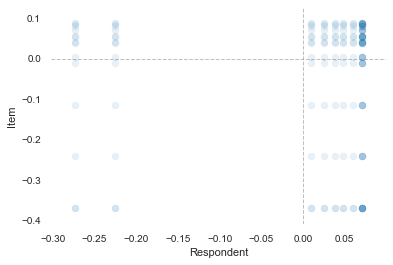

In [11]:
df_data_with_1st_qual = df_data.merge(df_qual_vec_respondent[[1]], how='left', left_on='回答者', right_index=True)
df_data_with_1st_qual = df_data_with_1st_qual.merge(df_qual_vec_item[[1]], how='left', left_on='item_type', right_index=True)
df_data_with_1st_qual = df_data_with_1st_qual.rename(columns={'1_x': 'respondent_1st_qual', '1_y': 'item_1st_qual'})

plt.scatter(df_data_with_1st_qual['respondent_1st_qual'], df_data_with_1st_qual['item_1st_qual'], alpha=0.1)

plt.xlabel('Respondent')
plt.ylabel('Item')

plt.axhline(y=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(x=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')

## scatter plot of respondents and items

visualiztion of respondents


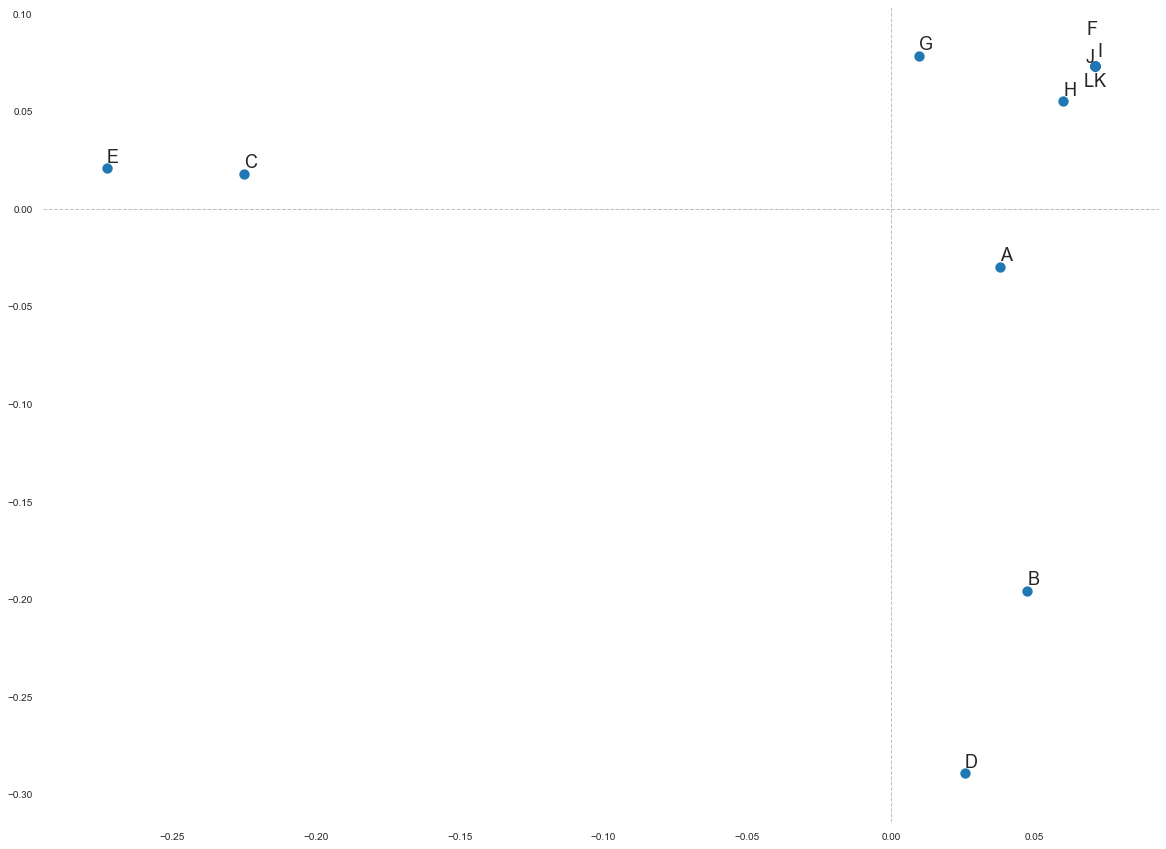

In [12]:
plt.figure(figsize=(20,15))
plt.scatter(df_qual_vec_respondent[1], df_qual_vec_respondent[2], s=100)
texts = [plt.text(df_qual_vec_respondent[1][i], df_qual_vec_respondent[2][i], df_qual_vec_respondent.index[i], fontsize=18, ha='center', va='center') for i in range(len(df_qual_vec_respondent))]
adjust_text(texts)

plt.axhline(y=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(x=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')

print("visualiztion of respondents")

In [13]:
map_shape = {'円柱': 'cyl', '4角柱': 'quad'}
map_color = {'赤': 'R', '緑': 'G', '青': 'B'}

def label_ja2en(s):
    l = s.split('_')
    return '_'.join([l[0]] + [map_shape[l[1]]] + [map_color[l[2]]])

visualiztion of items


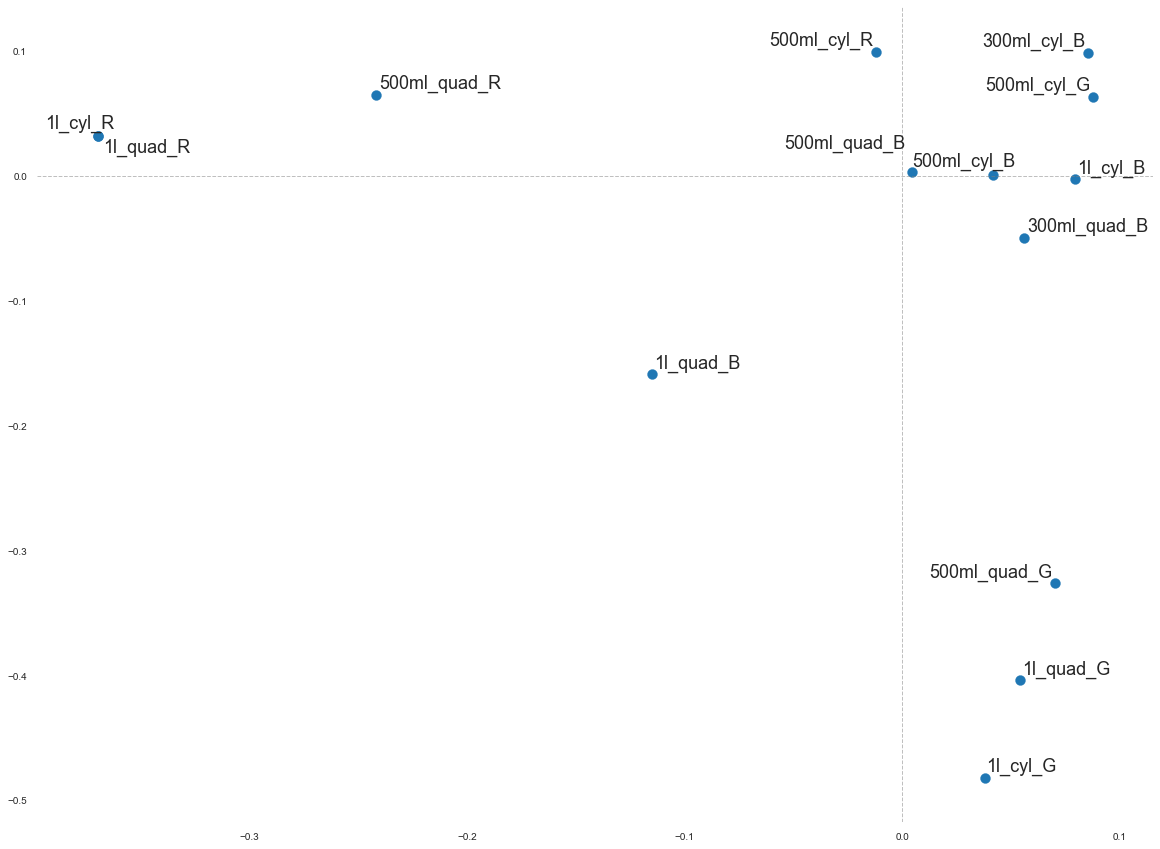

In [14]:
plt.figure(figsize=(20,15))
plt.scatter(df_qual_vec_item[1], df_qual_vec_item[2], s=100)
texts = [plt.text(df_qual_vec_item[1][i], df_qual_vec_item[2][i], label_ja2en(df_qual_vec_item.index[i]), fontsize=18, ha='center', va='center') for i in range(len(df_qual_vec_item))]
adjust_text(texts)

plt.axhline(y=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(x=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')

print("visualiztion of items")

visualiztion of respondents


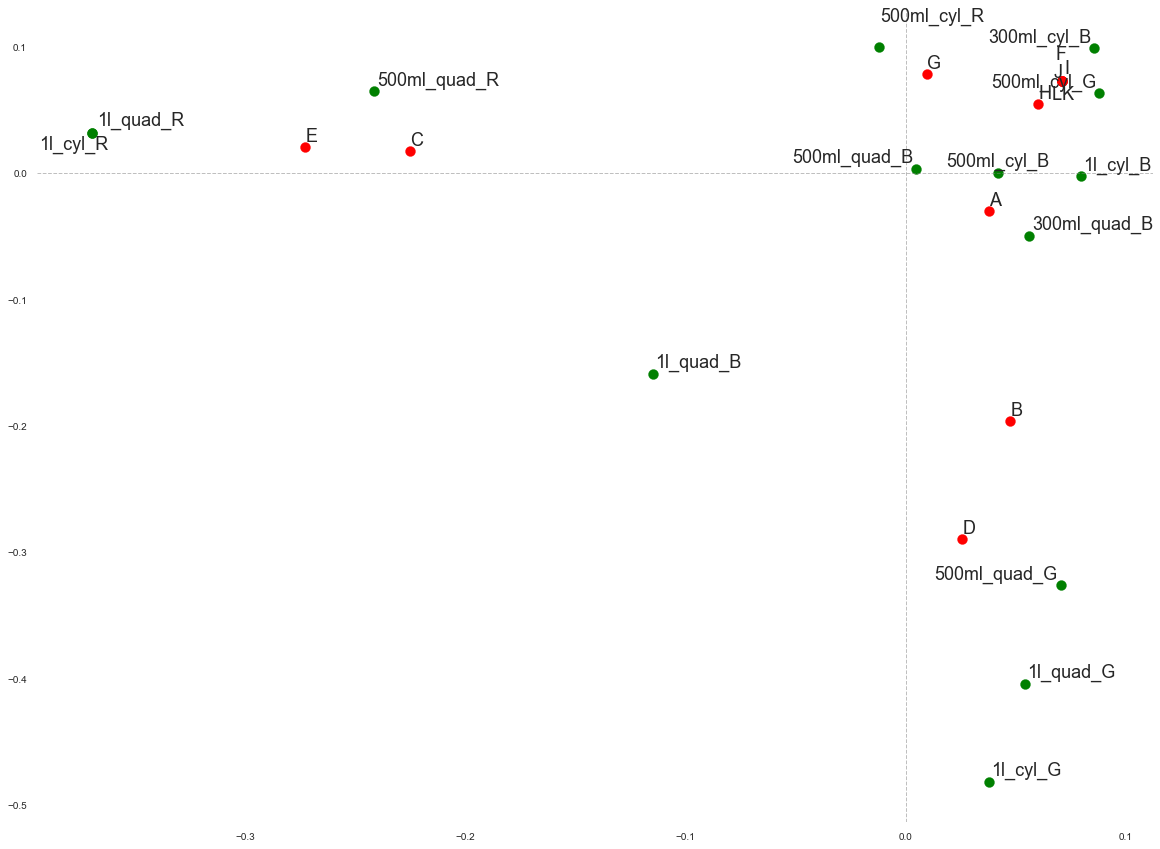

In [15]:
plt.figure(figsize=(20,15))
plt.scatter(df_qual_vec_respondent[1], df_qual_vec_respondent[2], s=100, c='r')
texts = [plt.text(df_qual_vec_respondent[1][i], df_qual_vec_respondent[2][i], df_qual_vec_respondent.index[i], fontsize=18, ha='center', va='center') for i in range(len(df_qual_vec_respondent))]
adjust_text(texts)


plt.scatter(df_qual_vec_item[1], df_qual_vec_item[2], s=100, c='g')
texts = [plt.text(df_qual_vec_item[1][i], df_qual_vec_item[2][i], label_ja2en(df_qual_vec_item.index[i]), fontsize=18, ha='center', va='center') for i in range(len(df_qual_vec_item))]
adjust_text(texts)

plt.axhline(y=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(x=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')

print("visualiztion of respondents")

## see data more

### Color and respondent

In [16]:
df_data.groupby(['回答者', '色'])['response'].sum().unstack()

色,緑,赤,青
回答者,,,
A,0,0,6
B,3,0,4
C,0,4,3
D,2,0,4
E,0,4,2
F,1,1,4
G,1,2,4
H,1,1,3
I,1,1,4


We find...
- everybody like blue
- only C and E prefer red to blue
- B and D tends to like green

わかること：
- みんな青好き
- C と E だけ赤も好む
- D と D だけ緑も好む

### Shape and resopndent

In [17]:
df_data.groupby(['回答者', '形'])['response'].sum().unstack()

形,4角柱,円柱
回答者,,
A,3,3
B,4,3
C,4,3
D,3,3
E,4,2
F,1,5
G,2,5
H,1,4
I,1,5


We find...
- A-E like quadrangular prism (4角柱)
- F-L like cylinder (円柱)

わかること：
- A-E は4角柱好き
- F-L は円柱好き

### volume and respondent

In [18]:
df_data.groupby(['回答者', '容量'])['response'].sum().unstack()

容量,1l,300ml,500ml
回答者,,,
A,2,2,2
B,3,0,4
C,3,0,4
D,4,0,2
E,3,0,3
F,1,1,4
G,1,1,5
H,1,0,4
I,1,1,4


We find...
- everybody like 500ml
- A-E like 1l too

わかること：
- 全員 500ml は好き
- A-E は 1l も好き